# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Import numpy and pandas **

In [1]:
import numpy  as np
import pandas  as pd

** Import visualization libraries and set %matplotlib inline. **

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [3]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** What are the top 5 zipcodes for 911 calls? **

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<AxesSubplot:xlabel='zip', ylabel='count'>

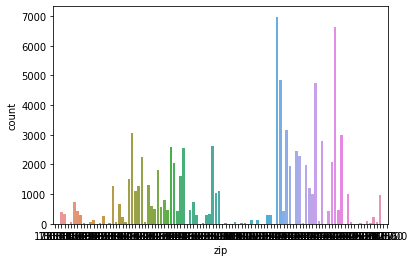

In [6]:
sns.countplot(x='zip',data=df)

** What are the top 5 townships (twp) for 911 calls? **

In [7]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [8]:
len(pd.unique(df['title']))

110

## Creating new features

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [10]:
new = df['title'].str.split(':',expand=True)
df['reason'] = new[0]
df['title'] = new[1]
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [11]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

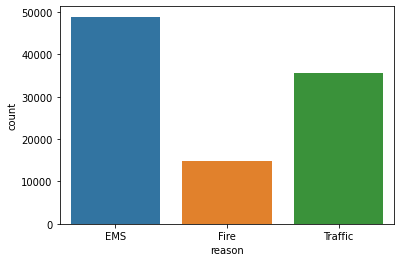

In [12]:
sns.countplot(data=df,x='reason')

In [13]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'],format = '%Y-%m-%d %H:%M:%S')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [15]:
df['hour'] = df['timeStamp'].dt.hour
df['month'] = df['timeStamp'].dt.month
df['day'] = df['timeStamp'].dt.weekday
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df = df.replace({'day':dmap})
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


<AxesSubplot:xlabel='day', ylabel='count'>

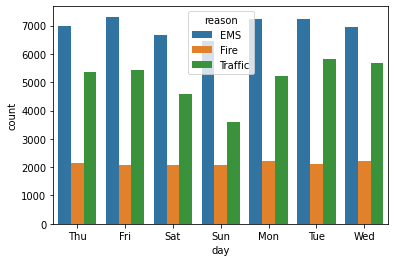

In [17]:
sns.countplot(x='day',data=df,hue='reason')

**Now do the same for Month:**

<AxesSubplot:xlabel='month', ylabel='count'>

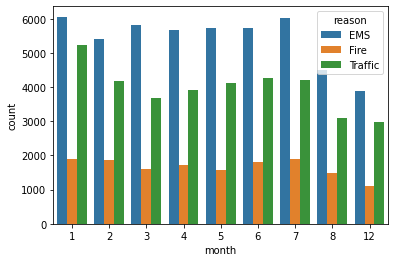

In [18]:
sns.countplot(x='month',data=df,hue='reason')

In [19]:
bymonth = df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [20]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='month'>

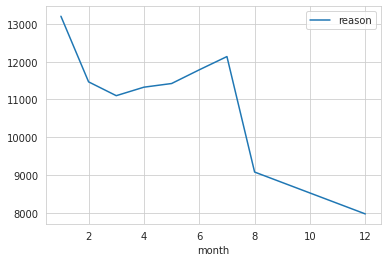

In [21]:
bymonth.plot(y='reason',kind='line')

In [22]:
bymonth.reset_index(inplace=True)
bymonth.head()

,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


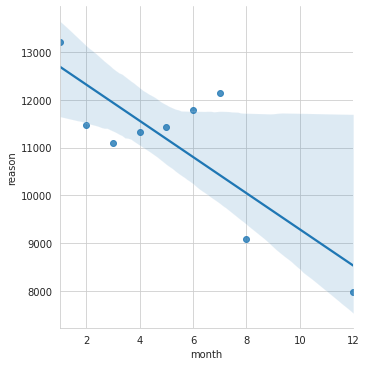

In [23]:
sns.lmplot(x='month',y='reason',data=bymonth)

In [24]:
df['date'] = df['timeStamp'].dt.date
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


<AxesSubplot:xlabel='date', ylabel='reason'>

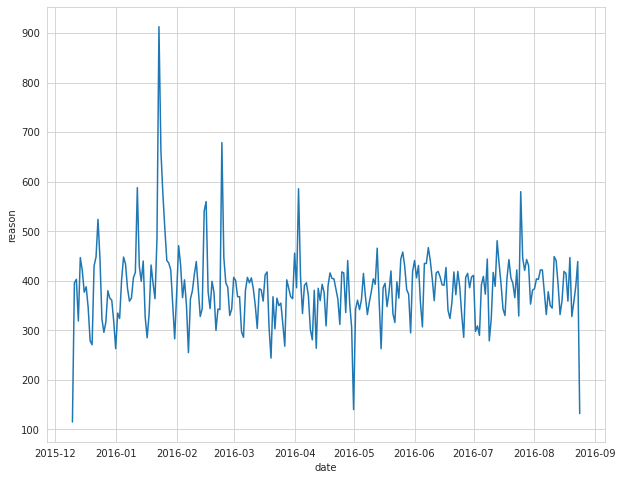

In [25]:
bydate = df.groupby('date').count()
bydate.head()
plt.figure(figsize=(10,8))
sns.lineplot(x='date',y='reason',data=bydate)

In [26]:
pd.unique(df['reason'])

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [27]:
bydate = df[df['reason']=='EMS'].groupby('date').count()
bydate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
date,,,,,,,,,,,,,
2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57
2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186
2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189
2015-12-13,190,190,190,178,190,190,190,190,190,190,190,190,190
2015-12-14,222,222,222,201,222,222,222,222,222,222,222,222,222


<AxesSubplot:xlabel='date', ylabel='reason'>

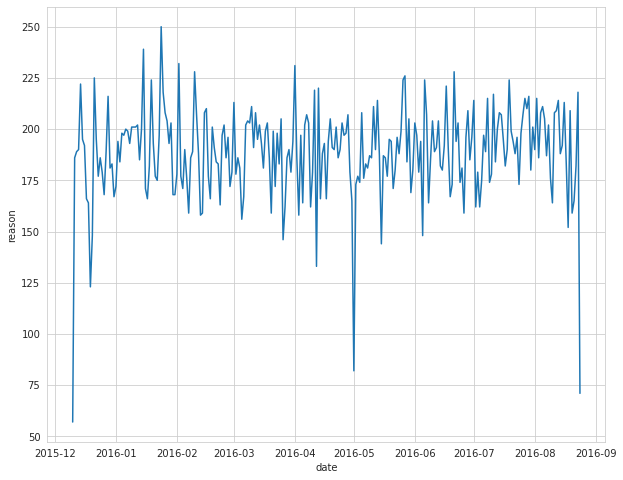

In [28]:
plt.figure(figsize=(10,8))
sns.lineplot(data=bydate,x='date',y='reason')

In [29]:
bydate = df[df['reason']=='Fire'].groupby('date').count()
bydate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
date,,,,,,,,,,,,,
2015-12-10,15,15,15,13,15,15,15,15,15,15,15,15,15
2015-12-11,69,69,69,59,69,69,68,68,69,69,69,69,69
2015-12-12,68,68,68,53,68,68,68,68,68,68,68,68,68
2015-12-13,51,51,51,48,51,51,51,51,51,51,51,51,51
2015-12-14,39,39,39,36,39,39,38,39,39,39,39,39,39


<AxesSubplot:xlabel='date', ylabel='reason'>

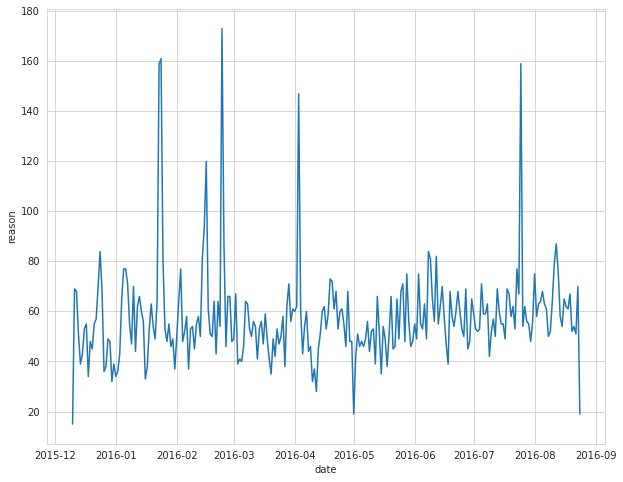

In [30]:
plt.figure(figsize=(10,8))
sns.lineplot(data=bydate,x='date',y='reason')

<AxesSubplot:xlabel='date', ylabel='reason'>

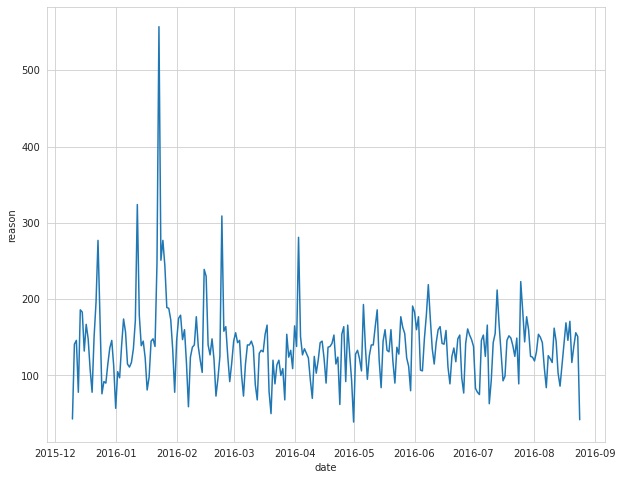

In [31]:
bydate = df[df['reason']=='Traffic'].groupby('date').count()
bydate.head()
plt.figure(figsize=(10,8))
sns.lineplot(data=bydate,x='date',y='reason')

In [32]:
#df['reason'].value_counts()
byhour = df.groupby(by=['day','hour']).count()['reason'].unstack()
byhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='day'>

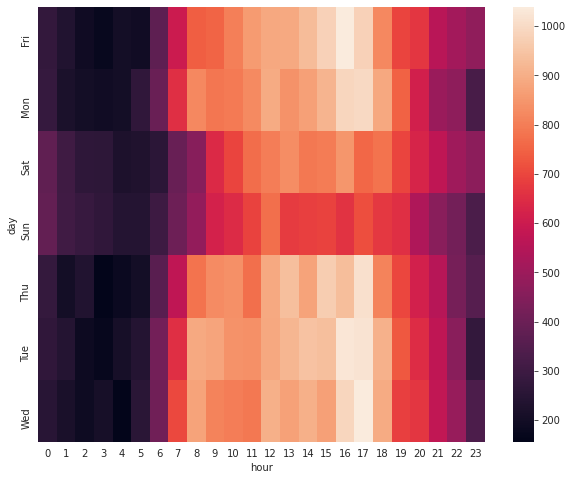

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(byhour)

<Figure size 720x576 with 0 Axes>

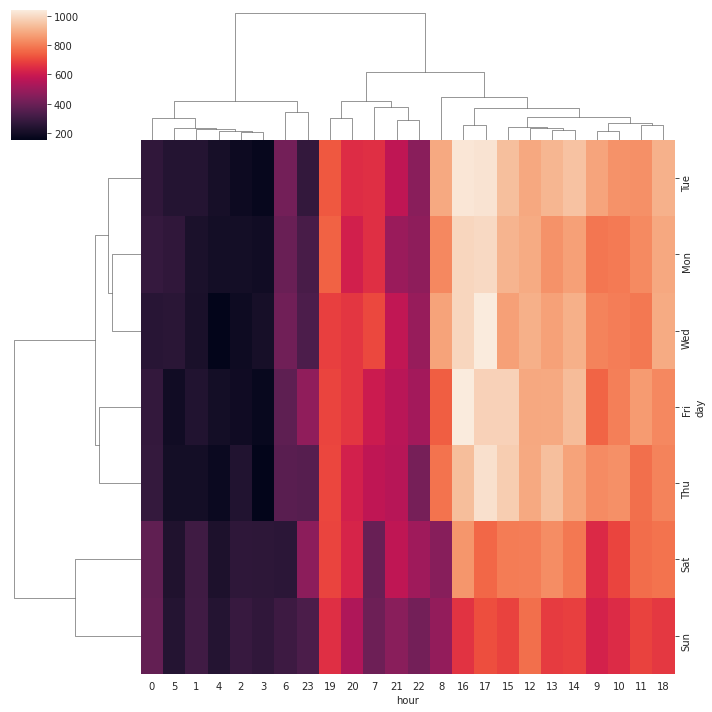

In [34]:
plt.figure(figsize=(10,8))
sns.clustermap(byhour)

In [38]:
#df['reason'].value_counts()
bymoth = df.groupby(by=['day','month']).count()['reason'].unstack()
bymoth

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<Figure size 720x576 with 0 Axes>

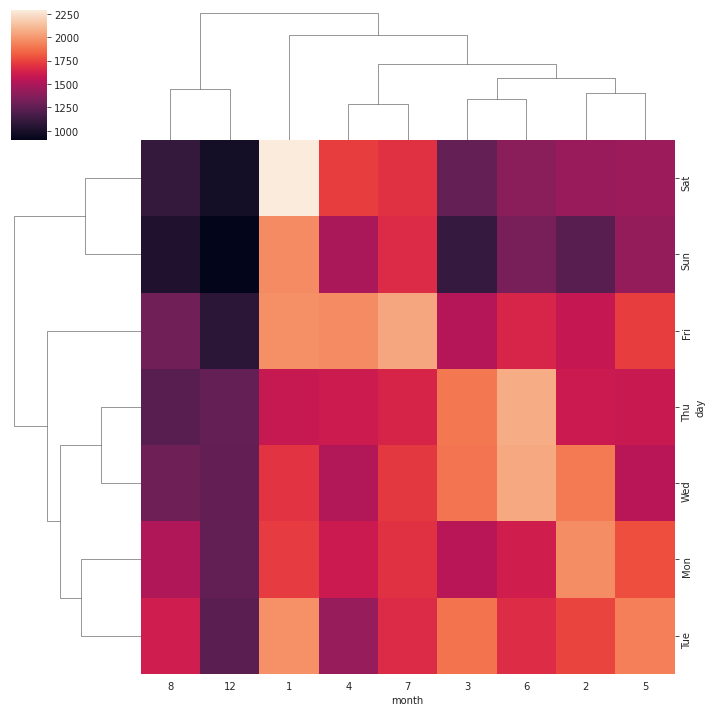

In [36]:
plt.figure(figsize=(10,8))
sns.clustermap(bymoth)

<AxesSubplot:xlabel='month', ylabel='day'>

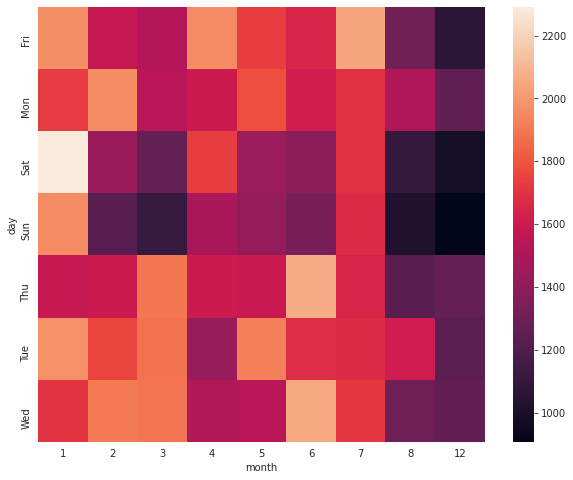

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(bymoth)